<a href="https://colab.research.google.com/github/aselshall/ML_Redtide_Example/blob/main/Redtide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Example 2: Red tide classification problem (large bloom, no bloom)
Decision trees with python (scikit-learn, and graphviz)

In [26]:
#General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import pydotplus
import joblib

In [5]:
from pathlib import Path
import random

import gdown
from pathlib import Path
Path('Input').mkdir(parents=True, exist_ok=True)
Path('Output').mkdir(parents=True, exist_ok=True)
file='maze_data.csv'
file_ID='1z7Y7cDHtWhKmAbFNl0ABlMp3NOA2fVQr'
url='https://drive.google.com/uc?id='
print('Input files download')
source=url+file_ID
destination='Input/{}'.format(file)
print('from {} to {}'.format(source,destination))
gdown.download(source, destination, quiet=True)

Input files download
from https://drive.google.com/uc?id=1z7Y7cDHtWhKmAbFNl0ABlMp3NOA2fVQr to Input/maze_data.csv


'Input/maze_data.csv'

In [7]:
df=pd.read_csv('Input/maze_data.csv')
#display(df) 

#### [2] Clean and prepare data

In [8]:
# Predictor variables
X=df.drop(columns=['index','bloom','output'])
#display(X)

#Target variable(or label, or predictand)
y=df.output
#display(y)

#### [3] Split data 

In [9]:
#Split to train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# #Save splitted data
# X_train.to_csv('X_train.csv') 
# X_test.to_csv('X_test.csv') 
# y_train .to_csv('y_train.csv') 
# y_test.to_csv('y_test.csv') 

#Display data
#display(X_train)
#display(y_train)

#### [4] Create, train, evaluate and save model 

In [27]:
#Split to train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# Define model: decision treee  
model=DecisionTreeClassifier()
#model=RandomForestClassifier()

#Train model 
model.fit(X_train,y_train)

#Make predictions
y_pred=model.predict(X_test)

#Evalaute predictions
#fine tune the model, choose another algorithm or model, or application<br>
#Accuracy:size_train_dataset, clean data (duplicates, missing data), irrelevent data
score=accuracy_score(y_test,y_pred)
print('Accuracy: {:0.2f}'.format(score))

#Save model to a file 
joblib.dump(model,'Redtide_Bloom_Pred.joblib')

Accuracy: 0.75


['Redtide_Bloom_Pred.joblib']

#### [5] Model interpretation
https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952<br>
Plot decision tree starting from root+decision node, to decision node, and to terminal node (leaf).<br>
Pure node means further spliting will not lead to further information gain, so classification trees do noy split on pure nodes.However, impure nodes can split further.<br>
The figure shows that setosa was correctly classified for all 12 points.The right side shows that many points are misclassified as no_bloom.<br>
Classification trees are a greedy algorithm which mean
s by default it will continue to split until it has a pure node.<br> 
The algorithm chooses the best split point (i.e., gini) for the impure node.<br>
Decision trees split on the feature that results in the largest information gain (e.g., gini or entropy criterion).<br>
IG = information before splitting (parent) — information after splitting 
If the impurity criterion is not zero then we can furthr split.

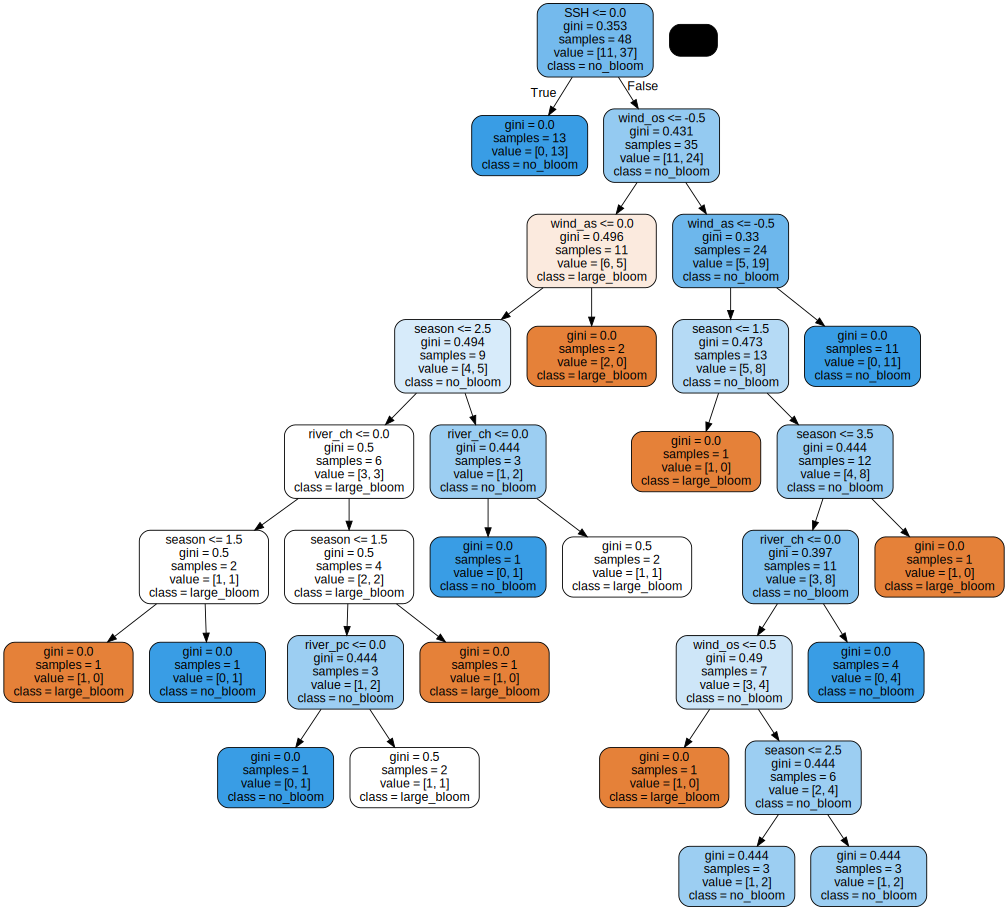

In [29]:
#load model from a file
model=joblib.load('Redtide_Bloom_Pred.joblib')

#Export model in visual format (to know how the model makes predictions)
dot_data=tree.export_graphviz(model,out_file=None, max_depth=None,label='all',rounded=True,filled=True,
                     feature_names=['season','SSH','river_ch','river_pc','wind_os','wind_as'],class_names=sorted(y.unique()))

#pydot to resize and saving 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"14,14!"')

#graphviz for screen display 
graphviz.Source(pydot_graph.to_string())

